In [1]:
monte_carlo_1<-function(rep,n,mu,var){
    x_bars<-c()
    sample_spread <- c()
    population_spread <- c()
    vars<-c()
    for(i in seq(1:rep)){
    cur_sample<-rnorm(n,mu,var)
    x_b <- mean(cur_sample)
    spread<-sum((cur_sample-mean(cur_sample))^2) #/(n-1)
    pop_spread<-sum((cur_sample-mu)^2)
    s2<-var(cur_sample)
    x_bars<-c(x_b,x_bars)
    vars<-c(s2,vars)
    #print(cur_sample)
    #print(s2)
    #print(spread)
    #print(s2 - spread)
    sample_spread<-c(spread,sample_spread)
    population_spread<-c(pop_spread,population_spread)
    }
    hist(x_bars)
    hist(vars)
    hist(sample_spread)
    hist(population_spread)
    print(mean(x_bars))
    print(mean(vars*(n-1)))
    print(mean(sample_spread))
    print(mean(population_spread))
    print(mean(vars*(n-1))/100)
   
}


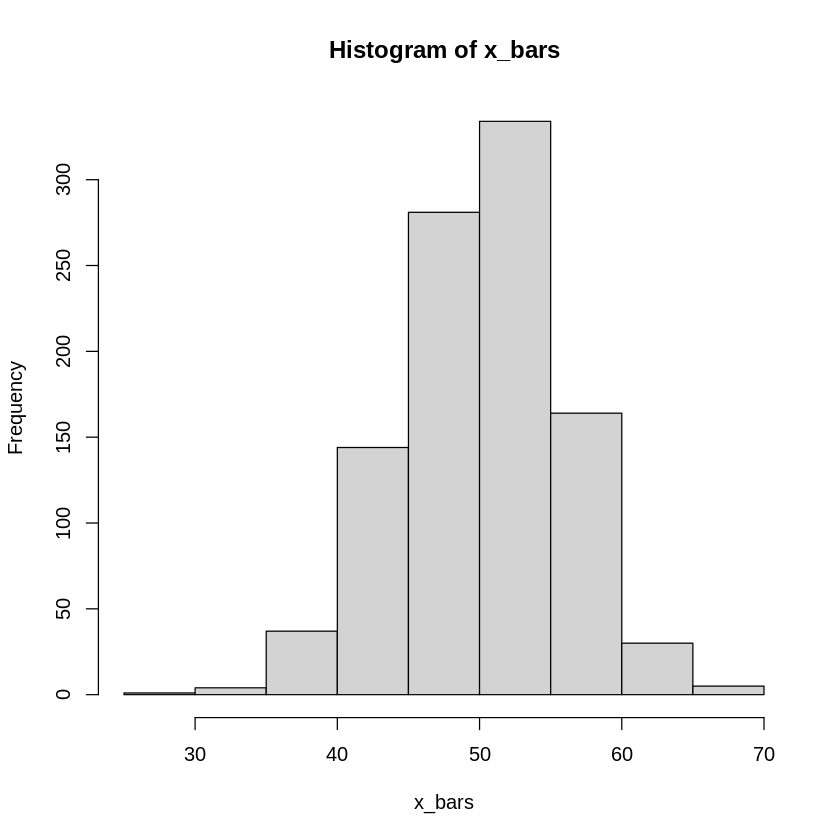

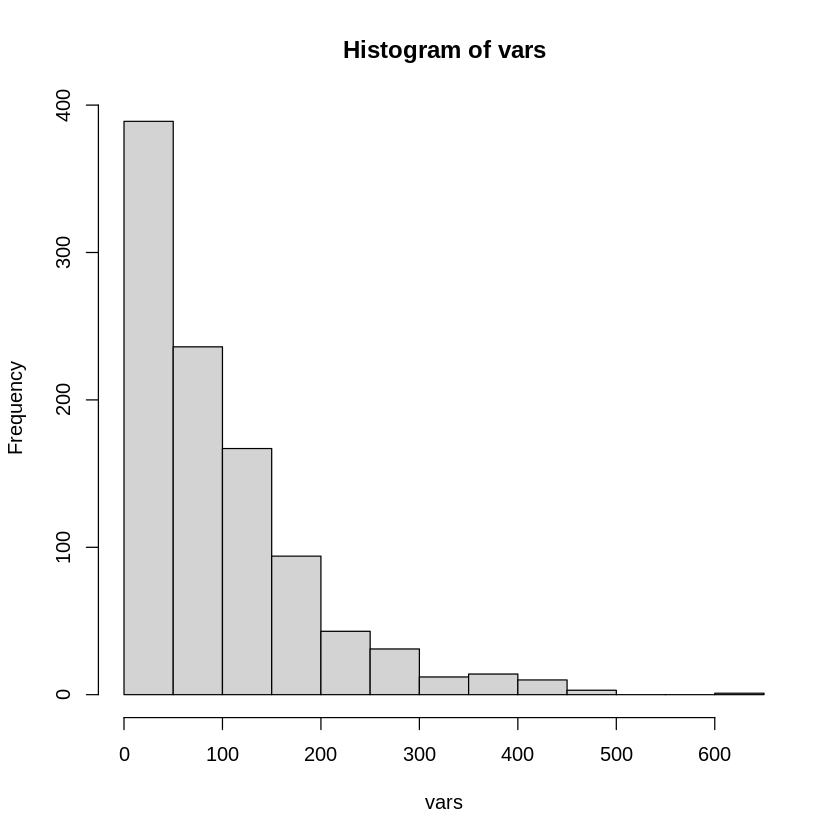

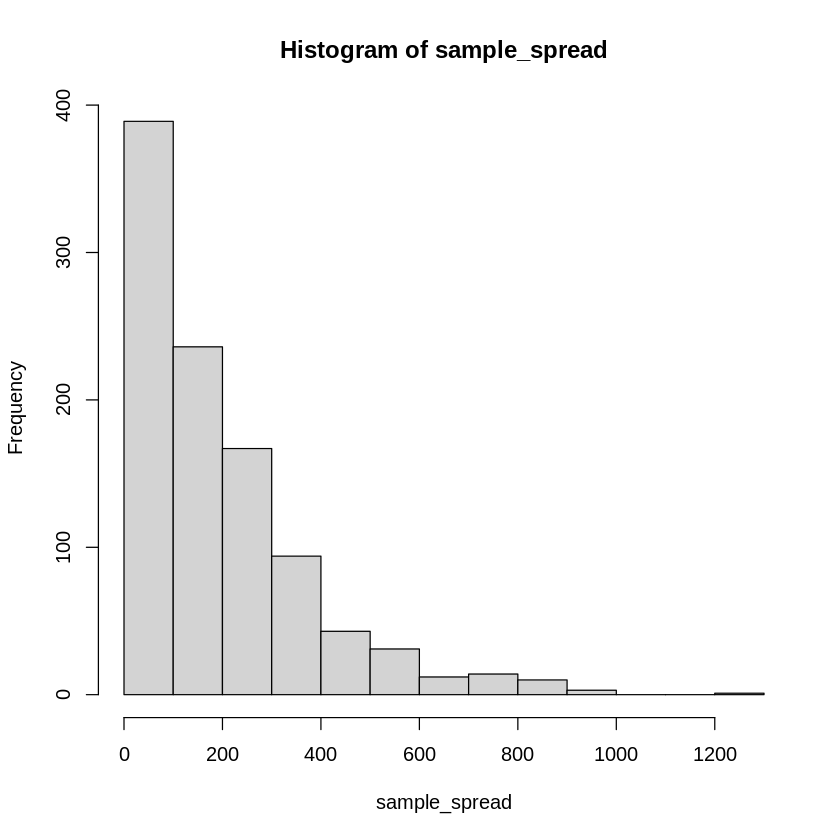

[1] 50.17894
[1] 193.2641
[1] 193.2641
[1] 289.5452
[1] 1.932641


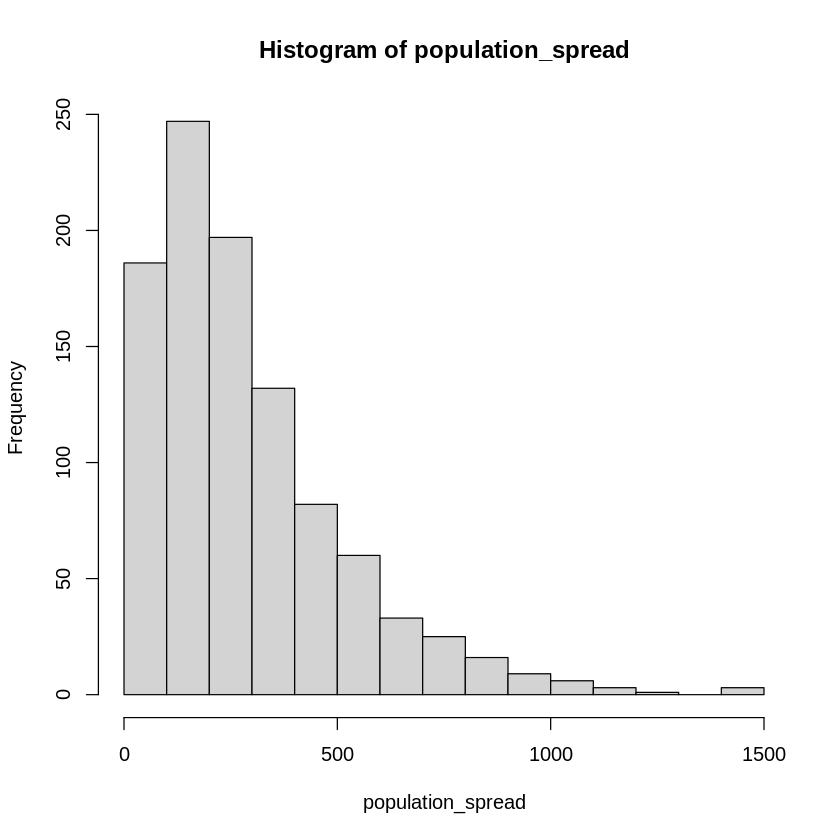

In [2]:
monte_carlo_1(1000,3,50,10)

In [31]:
monte_carlo_2<-function(rep,n,mu,stdev,alpha){
    x_bars<-c()
    LCL <- c()
    UCL <- c()
    is_in<-c()
    for(i in seq(1:rep)){
    cur_sample<-rnorm(n,mu,stdev)
    x_b <- mean(cur_sample)
    c_LCL<- x_b - abs(qnorm(alpha/2))*stdev/sqrt(n)
    c_UCL<- x_b + abs(qnorm(alpha/2))*stdev/sqrt(n)
    x_bars<-c(x_b,x_bars)
    LCL<-c(c_LCL,LCL)
    UCL<-c(c_UCL,UCL)
    if(c_LCL <= mu && c_UCL >= mu ){
         is_in<-c(1,is_in)   
        }
    else {
        is_in<-c(0,is_in)
    }
    #print(x_b)
    #print(LCL)
    #print(UCL)
    }
    hist(x_bars)
    hist(LCL)
    hist(UCL)
    hist(is_in)
    print(data.frame(x_bars=x_bars,LCL = LCL, UCL = UCL, "Is in" = is_in))
    print(sum(is_in))
    print(sum(is_in)/rep)
}

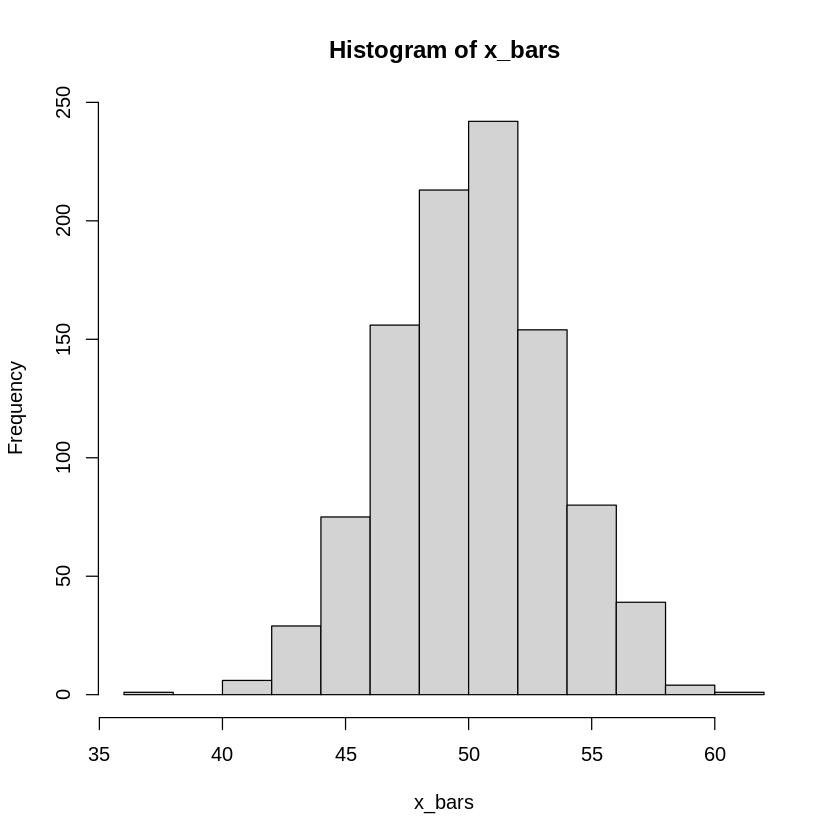

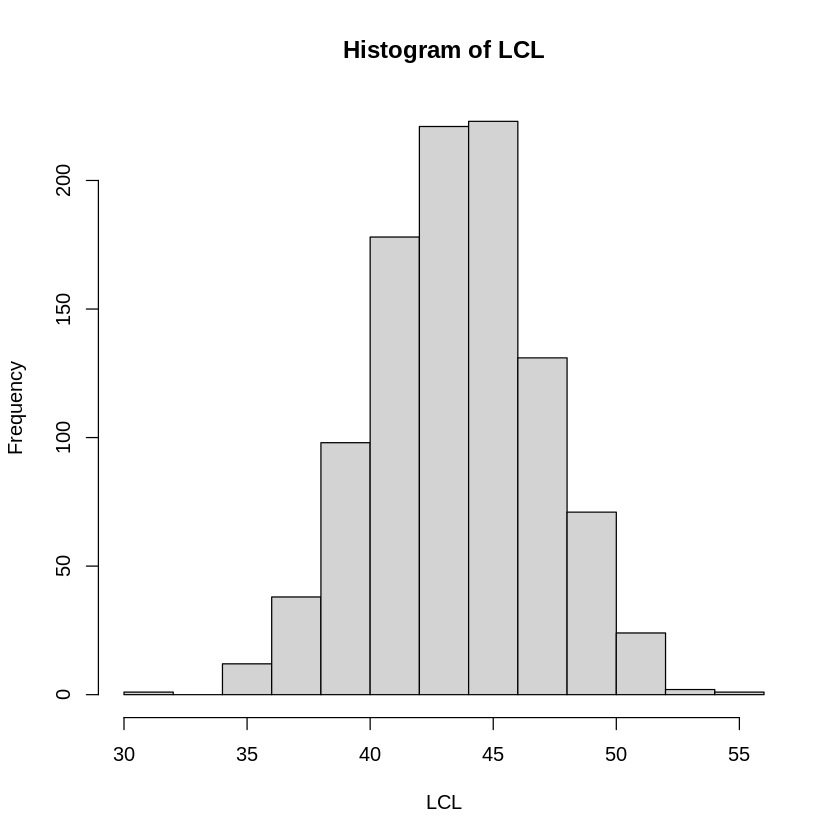

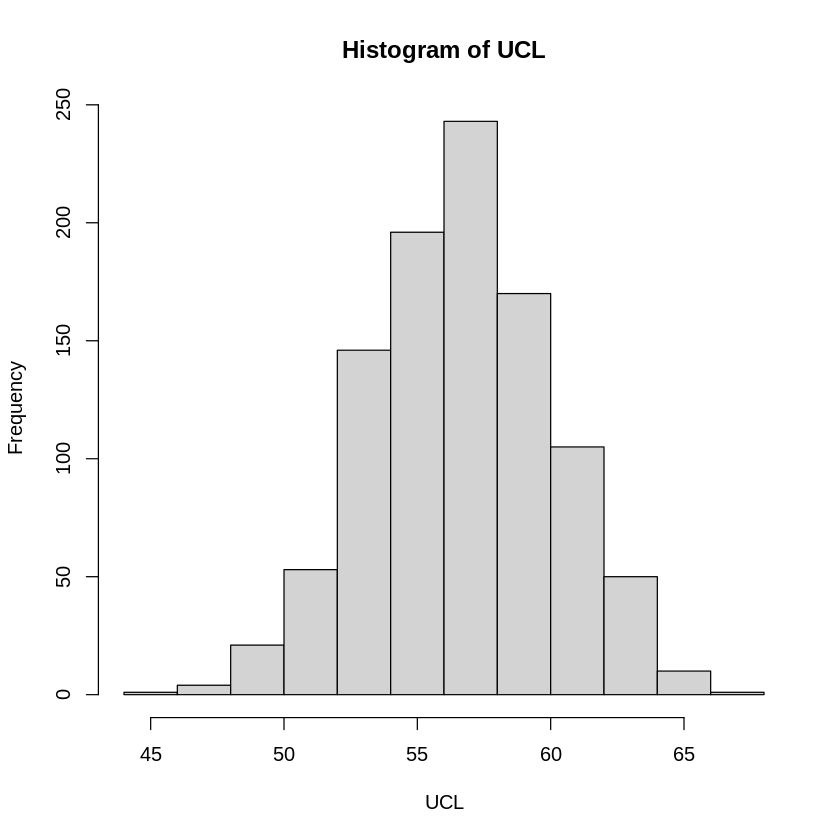

       x_bars      LCL      UCL Is.in
1    51.12857 44.59536 57.66178     1
2    49.92080 43.38759 56.45401     1
3    50.60934 44.07613 57.14256     1
4    47.60647 41.07326 54.13969     1
5    52.90076 46.36755 59.43397     1
6    46.69357 40.16036 53.22679     1
7    48.60913 42.07592 55.14234     1
8    52.58561 46.05239 59.11882     1
9    54.59480 48.06158 61.12801     1
10   53.82425 47.29104 60.35747     1
11   52.05924 45.52603 58.59245     1
12   51.24865 44.71544 57.78186     1
13   49.06460 42.53138 55.59781     1
14   51.58238 45.04916 58.11559     1
15   44.41542 37.88221 50.94864     1
16   50.06065 43.52744 56.59387     1
17   51.39675 44.86354 57.92997     1
18   51.53097 44.99776 58.06418     1
19   55.04886 48.51565 61.58208     1
20   52.11857 45.58535 58.65178     1
21   57.35172 50.81851 63.88494     0
22   47.35543 40.82221 53.88864     1
23   48.70951 42.17630 55.24272     1
24   43.09876 36.56554 49.63197     0
25   56.80527 50.27206 63.33849     0
26   56.1556

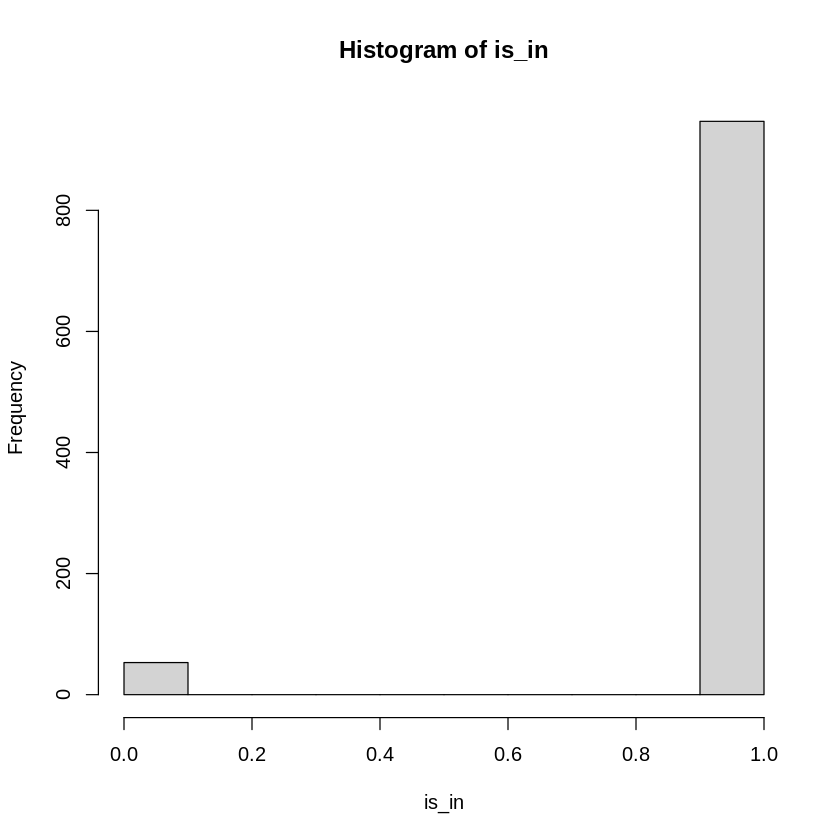

In [32]:
monte_carlo_2(1000,9,50,10,0.05)